In [2]:
%matplotlib inline
from IPython import display

import os, io, itertools, collections, importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import rtmtools.lblrtm.aerutils as aerutils
importlib.reload(aerutils)
import rtmtools.clirad.sw.wrangle as cliradwrangle
importlib.reload(cliradwrangle)
import rtmtools.rrtmg.lw.wrangle as rrtmgwrangle
importlib.reload(rrtmgwrangle)

import climatools.offline_scripts.intermodel as scripts_intermodel

In [3]:
name_molecule = r'H2O CO2 O3 CH4'

In [6]:
# Load output data. 1 x CH4, CLIRAD
path_file = os.path.join('/nuwa_cluster/home/jackyu/radiation',
                         'clirad',
                         'LW/examples/hitran2012',
                         'ch4_.994e-6',
                         'no_h2ocont/midlatitude_summer',
                         'OUTPUT_CLIRAD.dat')

pnl_ch4_clirad = cliradwrangle.OUTPUT_CLIRAD_to_PandasPanel(readfrom=path_file,
                                                      cooling_rate=True,
                                                      signed_fluxes=True)



In [8]:
# Load output data. 2 x CH4, CLIRAD
path_file = os.path.join('/nuwa_cluster/home/jackyu/radiation',
                         'clirad',
                         'LW/examples/hitran2012',
                         'ch4_1.988e-6',
                         'no_h2ocont/midlatitude_summer',
                         'OUTPUT_CLIRAD.dat')

pnl_2xch4_clirad = cliradwrangle.OUTPUT_CLIRAD_to_PandasPanel(readfrom=path_file,
                                                      cooling_rate=True,
                                                      signed_fluxes=True)


In [9]:
# Load output data. CH4 + H2O + CO2 + O3. CLIRAD
path_file = os.path.join('/nuwa_cluster/home/jackyu/radiation',
                         'clirad',
                         'LW/examples/hitran2012',
                         'h2o_mls_co2_607.5e-6_o3_mls_ch4_.994e-6',
                         'no_h2ocont/midlatitude_summer',
                         'OUTPUT_CLIRAD.dat')

pnl_ch4_gases_clirad = cliradwrangle.OUTPUT_CLIRAD_to_PandasPanel(readfrom=path_file,
                                                      cooling_rate=True,
                                                      signed_fluxes=True)

In [10]:
# Load output data. 2 x CH4 + H2O + CO2 + O3. CLIRAD
path_file = os.path.join('/nuwa_cluster/home/jackyu/radiation',
                         'clirad',
                         'LW/examples/hitran2012',
                         'h2o_mls_co2_607.5e-6_o3_mls_ch4_1.988e-6',
                         'no_h2ocont/midlatitude_summer',
                         'OUTPUT_CLIRAD.dat')

pnl_2xch4_gases_clirad = cliradwrangle.OUTPUT_CLIRAD_to_PandasPanel(readfrom=path_file,
                                                      cooling_rate=True,
                                                      signed_fluxes=True)

(CLIRAD ch4)
       pressure     flux_up  flux_down    net_flux  cooling_rate
70     0.002417 -419.061184   0.000013 -419.061171      0.000000
30   299.800000 -420.204664   0.491123 -419.713541     -0.023449
0   1013.000000 -423.786164   6.428994 -417.357170      0.086285

(CLIRAD 2xch4)
       pressure     flux_up  flux_down    net_flux  cooling_rate
70     0.002417 -417.262474   0.000013 -417.262461      0.000000
30   299.800000 -418.798834   0.732140 -418.066694     -0.030640
0   1013.000000 -423.786164   8.805387 -414.980777      0.111291

(CLIRAD ch4 + gases)
       pressure     flux_up   flux_down    net_flux  cooling_rate
70     0.002417 -291.825859    0.014376 -291.811483     25.710004
30   299.800000 -310.079845   55.114743 -254.965102      2.258445
0   1013.000000 -423.786164  309.238620 -114.547544      1.529851

(CLIRAD 2xch4 + gases)
       pressure     flux_up   flux_down    net_flux  cooling_rate
70     0.002417 -290.744879    0.014376 -290.730503     25.710004
30   299.

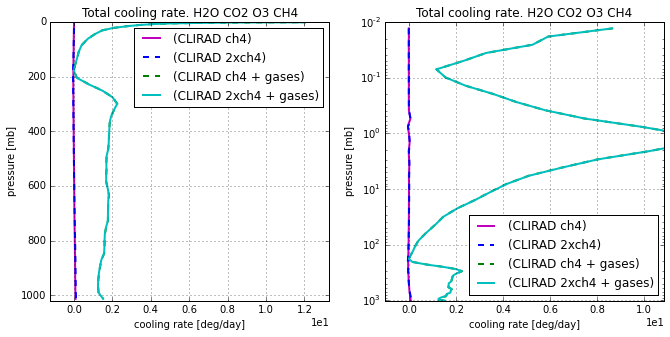

In [14]:
scripts_intermodel.lw_results_all_wavenumbers(
name_molecule=name_molecule,
infos_spectralband=[('(CLIRAD ch4)', 'm', '-', pnl_ch4_clirad),
                    ('(CLIRAD 2xch4)', 'b', '--', pnl_2xch4_clirad),
                    ('(CLIRAD ch4 + gases)', 'g', '--', pnl_ch4_gases_clirad),
                    ('(CLIRAD 2xch4 + gases)', 'c', '-', pnl_2xch4_gases_clirad)])